In [1]:
import pandas as pd
import numpy as np
import pickle
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.metrics import f1_score,recall_score,accuracy_score,precision_score,confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,precision_recall_curve
from imblearn.over_sampling import RandomOverSampler,SMOTE
import warnings
warnings.filterwarnings("ignore")

# 1.Health-Insurance-Lead-Prediction

# 2.Data Gathering

In [2]:
traindf = pd.read_csv("Health Insurance Lead Prediction Raw Data.csv")
testdf = pd.read_csv('test.csv')
traindf.head(10)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1
6,7,C3,679,Owned,Individual,28,28,No,NaN,NaN,NaN,17,10640.0,0
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,1
8,9,C15,3497,Owned,Joint,52,43,No,X1,14.0,3.0,1,27283.2,0
9,10,C1,530,Owned,Joint,59,26,Yes,NaN,7.0,4.0,18,21100.8,1


# 3.Exploratory Data Analysis

In [3]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

### Description of data

In [4]:
traindf.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


### target : Response

In [5]:
traindf["Response"].value_counts()

0    38673
1    12209
Name: Response, dtype: int64

<AxesSubplot:xlabel='Response', ylabel='count'>

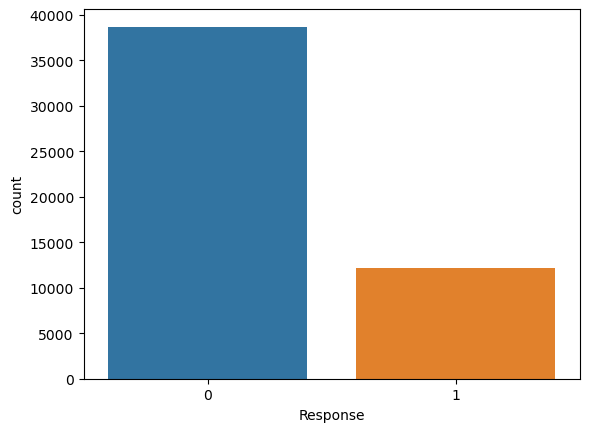

In [6]:
sns.countplot(traindf["Response"])

* It is a binary calss classification problem.
* From the above plot we can understand that there is a problem of imbalance in dataset.

### Duplicate checks

In [7]:
traindf.duplicated().sum()

0

### Nan/Null Value checks

In [8]:
print(traindf.isna().sum())


ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64


In [9]:
print(testdf.isna().sum())

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64


* There is a large number of NaN/Null values are present in both train and test dataset 
  Therefore dropping the row is not good because we are reducing actual data in a large amount.
* We want to consider some imputation method to fill the values.

In [10]:
traindf['Health Indicator'].value_counts() # we can use mode for imputation

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

In [11]:
traindf['Holding_Policy_Duration'].value_counts() # we use here mode for imputation
# Also we have to replace 14+ with 15 for encoding

1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

In [12]:
traindf['Holding_Policy_Type'].value_counts() # we use mode for imputation

3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

### 1.ID

In [13]:
traindf["ID"].nunique() #ID columns contain all discrete value which won't impact on predictions

50882

### 2.City_Code

In [14]:
traindf["City_Code"].value_counts() # Here we use ordinal encoding

C1     8973
C2     7747
C3     4889
C4     3671
C9     2185
C6     1950
C7     1910
C8     1806
C10    1611
C5     1364
C15    1186
C17    1159
C11    1147
C16    1135
C13    1005
C20     926
C19     899
C12     868
C18     797
C14     746
C21     679
C23     587
C24     553
C22     516
C26     499
C29     387
C25     366
C27     295
C33     286
C28     285
C32     160
C34     130
C30      58
C35      56
C36      36
C31      15
Name: City_Code, dtype: int64

#### City_Code vs Response

<AxesSubplot:xlabel='City_Code', ylabel='count'>

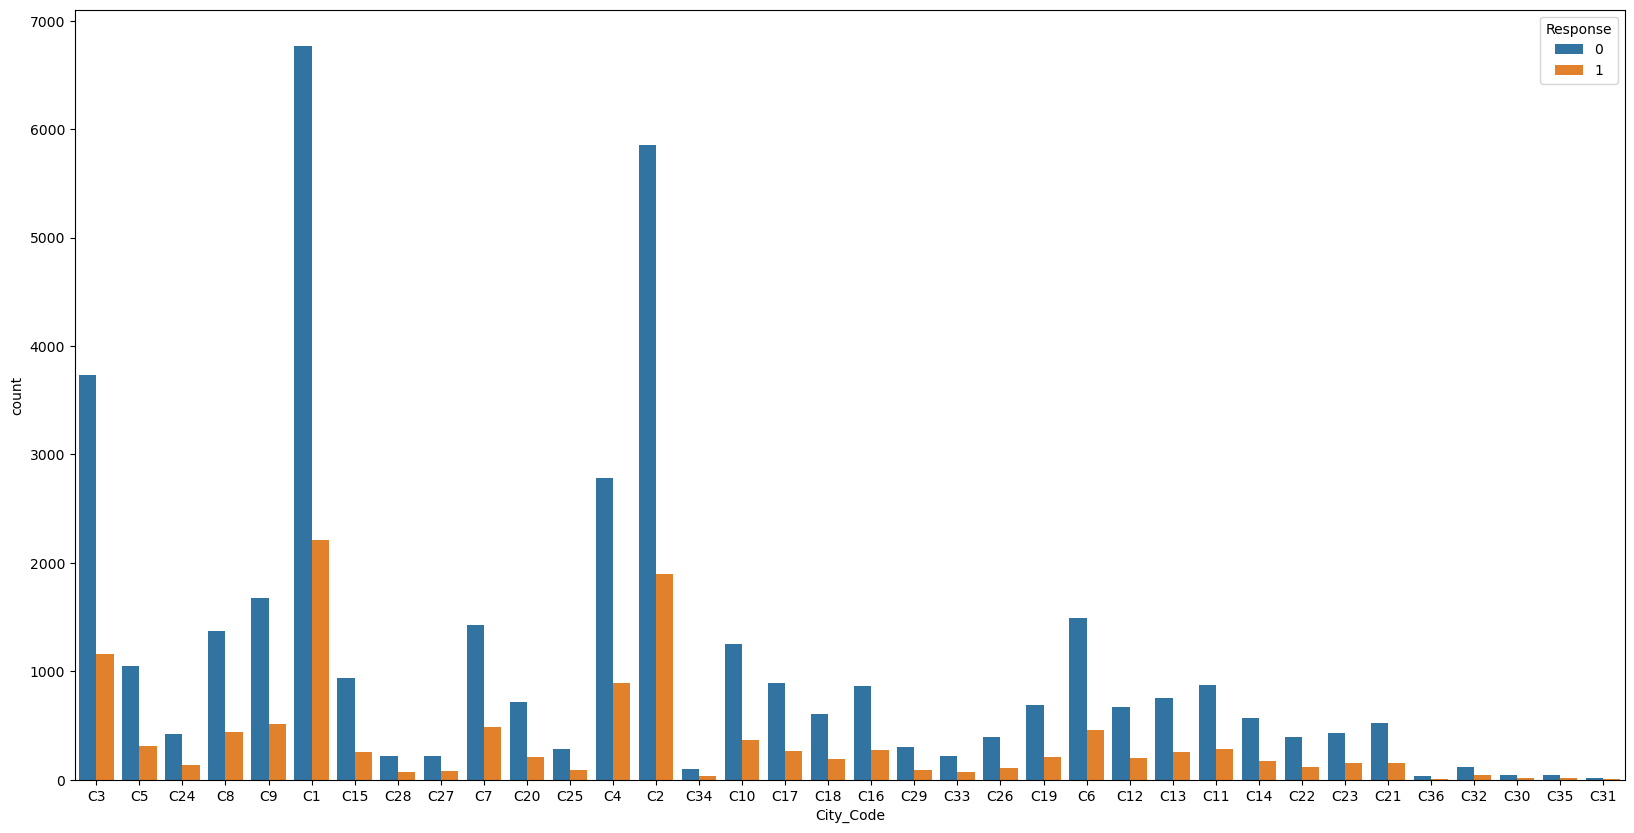

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(x='City_Code',hue='Response',data=traindf)

>Cites like c1,c2 consist high distribution .

>In all of the cities, class(response) 0 is dominating .

### 3.Region_Code 

In [16]:
traindf["Region_Code"].value_counts()

1       96
5       75
4       73
6       73
2       73
        ..
6041     1
5316     1
5606     1
5282     1
5450     1
Name: Region_Code, Length: 5316, dtype: int64

### 4.Accomodation_Type

In [17]:
traindf["Accomodation_Type"].value_counts()

Owned     27951
Rented    22931
Name: Accomodation_Type, dtype: int64

<AxesSubplot:xlabel='Accomodation_Type', ylabel='count'>

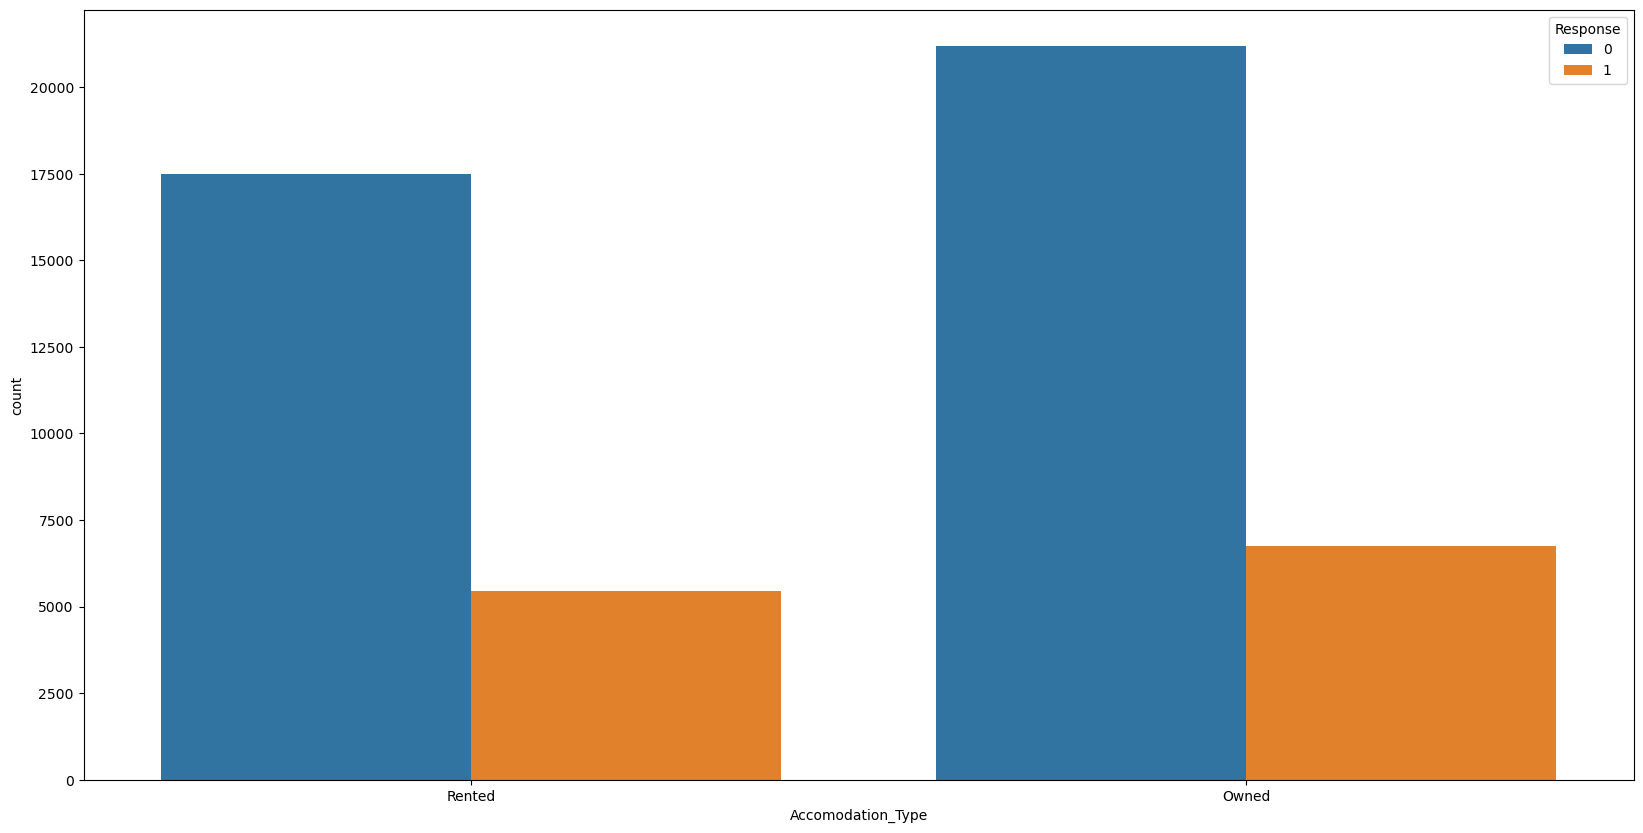

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(x='Accomodation_Type',hue='Response',data=traindf)

* Customers who owned house have more interest on new insurance as compared to customers have rented house.

### 5.Reco_Insurance_Type  

In [19]:
traindf["Reco_Insurance_Type"].value_counts()

Individual    40536
Joint         10346
Name: Reco_Insurance_Type, dtype: int64

<AxesSubplot:xlabel='Reco_Insurance_Type', ylabel='count'>

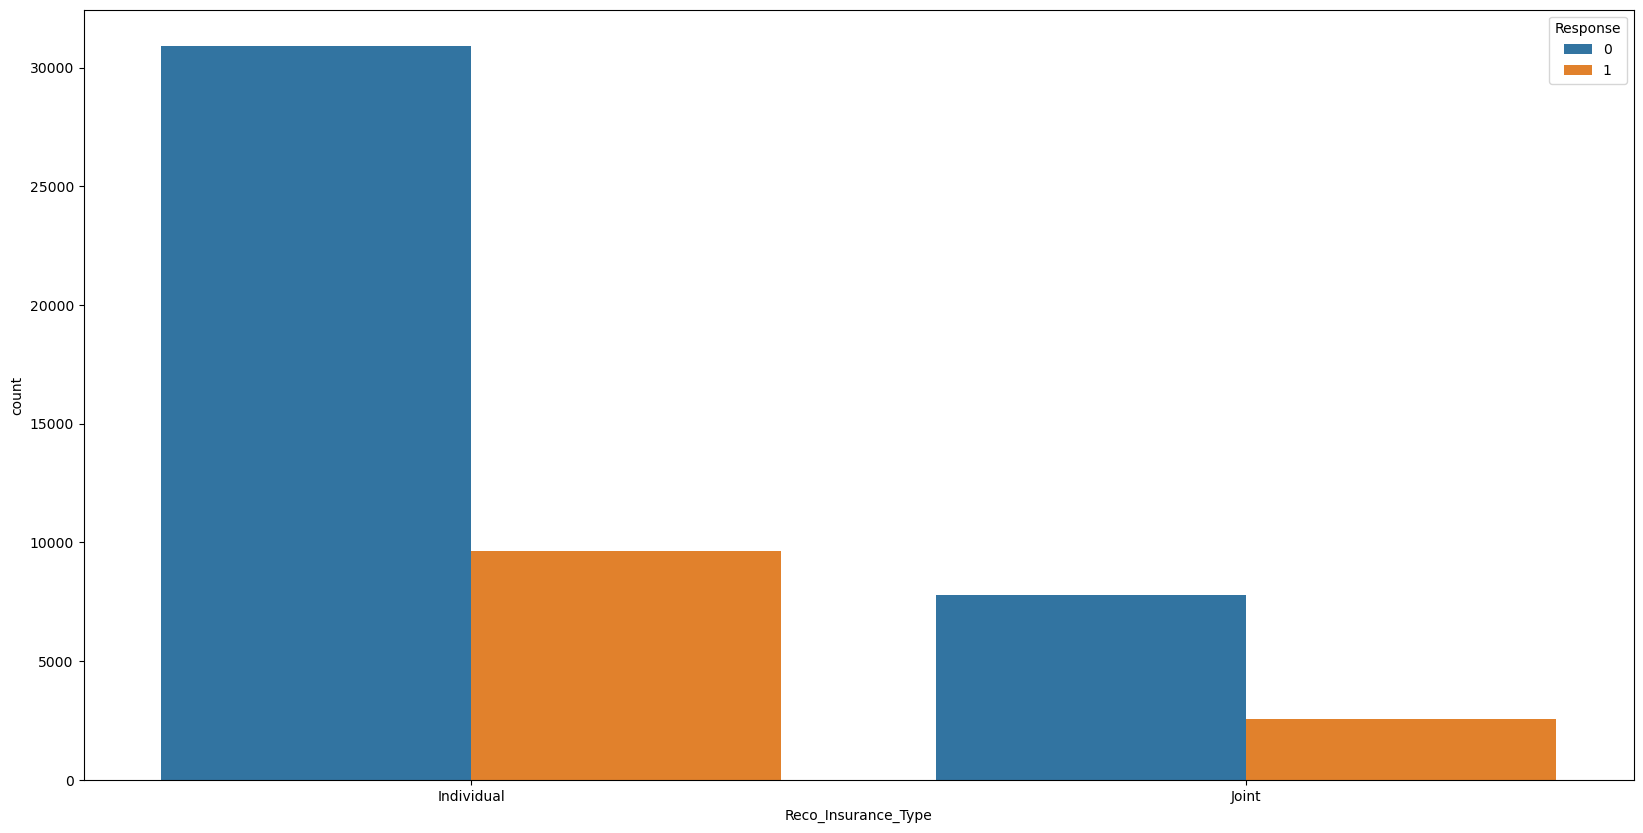

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(x='Reco_Insurance_Type',hue='Response',data=traindf)

* Most of customers interested on individual insurance

### 6.Upper_Age 

In [21]:
traindf["Upper_Age"].unique()

array([36, 75, 32, 52, 44, 28, 59, 21, 66, 20, 27, 34, 43, 55, 23, 18, 22,
       25, 24, 40, 26, 56, 35, 63, 49, 64, 67, 42, 71, 57, 73, 31, 19, 48,
       65, 54, 33, 30, 69, 68, 37, 29, 62, 58, 38, 39, 60, 41, 45, 51, 46,
       70, 61, 74, 53, 72, 50, 47], dtype=int64)

<AxesSubplot:>

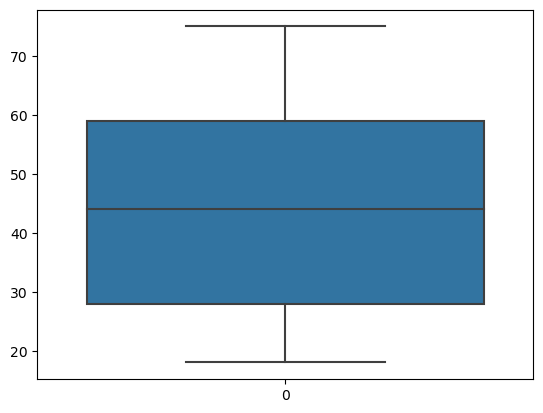

In [22]:
sns.boxplot(data=traindf["Upper_Age"], orient= "v")

<AxesSubplot:xlabel='Upper_Age', ylabel='Density'>

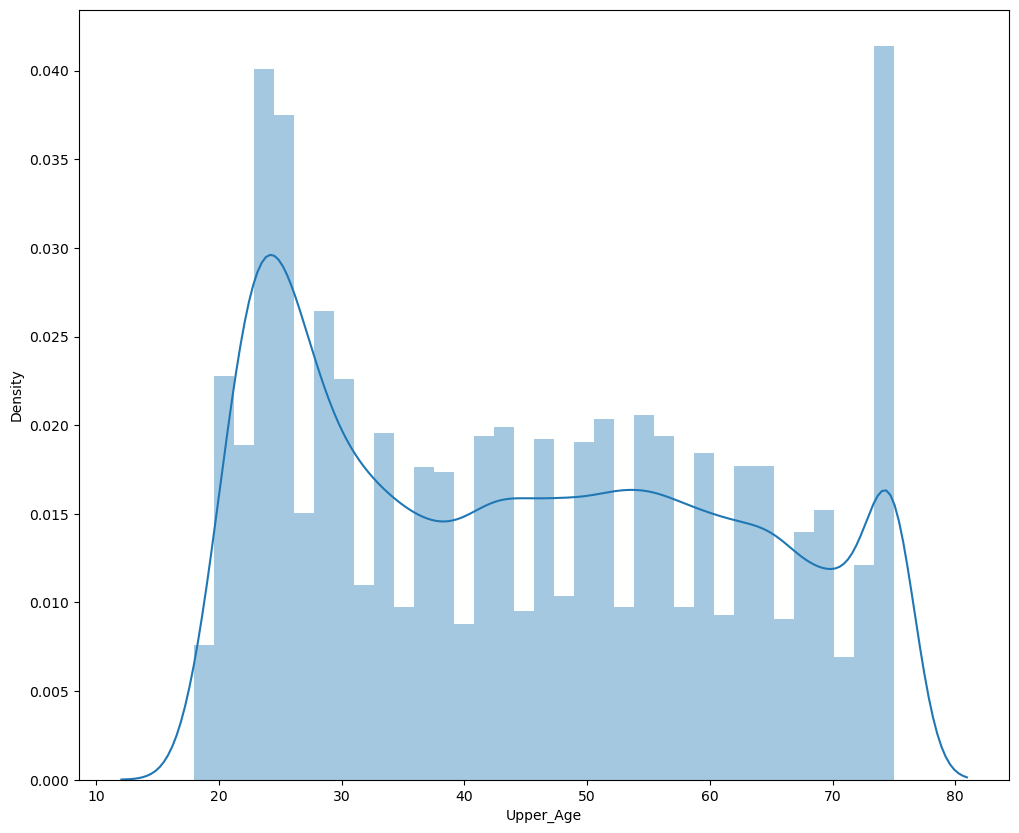

In [23]:
plt.figure(figsize=(12,10))
sns.distplot(traindf['Upper_Age'])

### 7.Lower_Age

[36 22 32 48 44 52 28 73 43 26 21 47 66 20 27 34 55 23 18 25 24 56 35 63
 64 67 75 42 71 68 31 19 65 54 33 74 30 69 29 62 58 39 60 57 41 40 45 37
 51 59 49 38 46 70 61 53 16 72 50 17]


<AxesSubplot:xlabel='Lower_Age', ylabel='Density'>

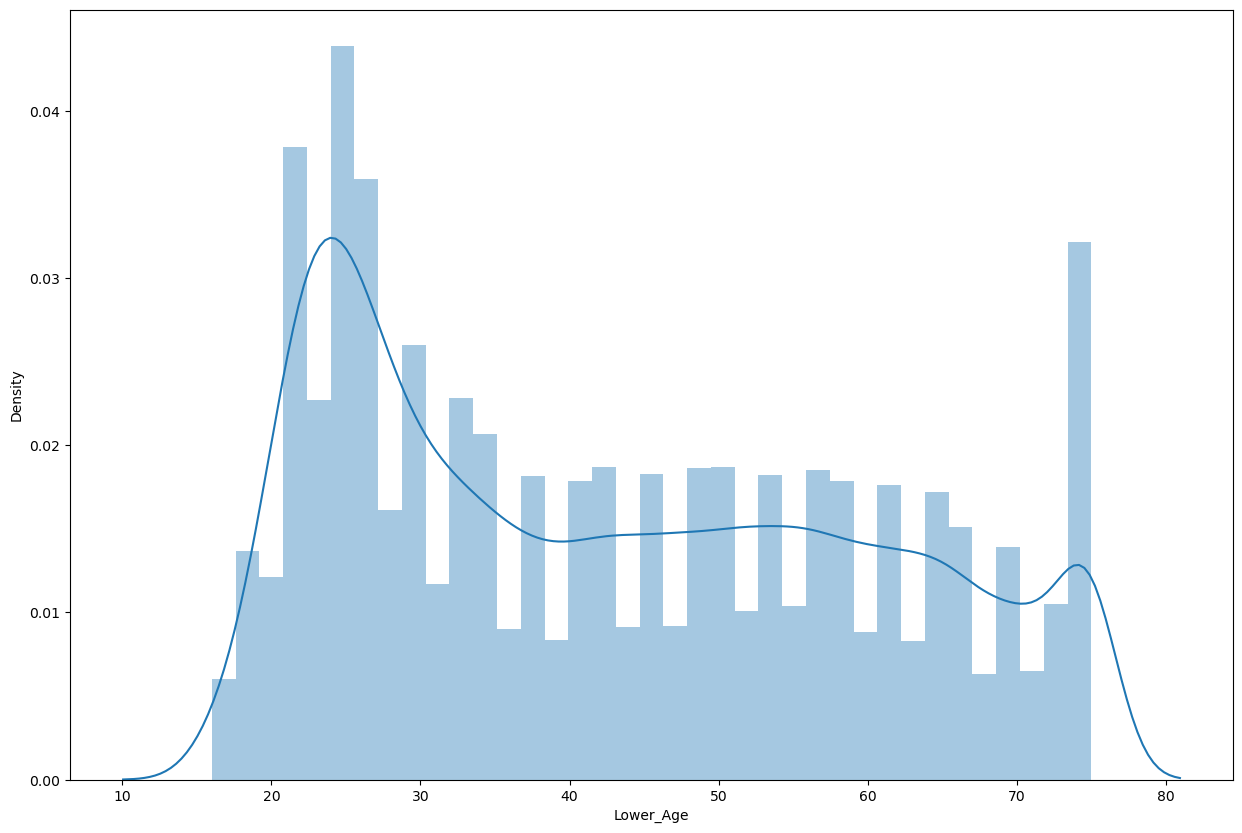

In [24]:
print(traindf["Lower_Age"].unique())
plt.figure(figsize=(15,10))
sns.distplot(traindf['Lower_Age'], label='Train data')

<AxesSubplot:>

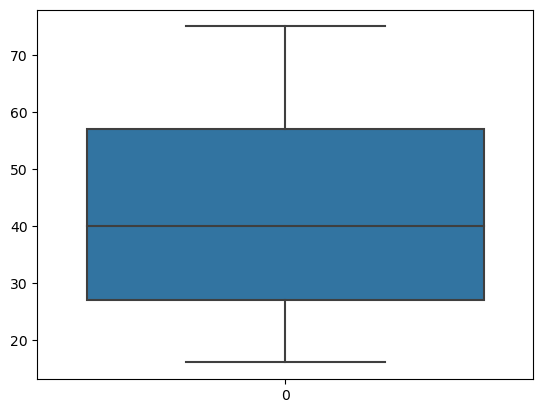

In [25]:
sns.boxplot(data=traindf["Lower_Age"], orient= "v")

### 8.Is_spouse

In [26]:
traindf["Is_Spouse"].value_counts()

No     42460
Yes     8422
Name: Is_Spouse, dtype: int64

<AxesSubplot:xlabel='Is_Spouse', ylabel='count'>

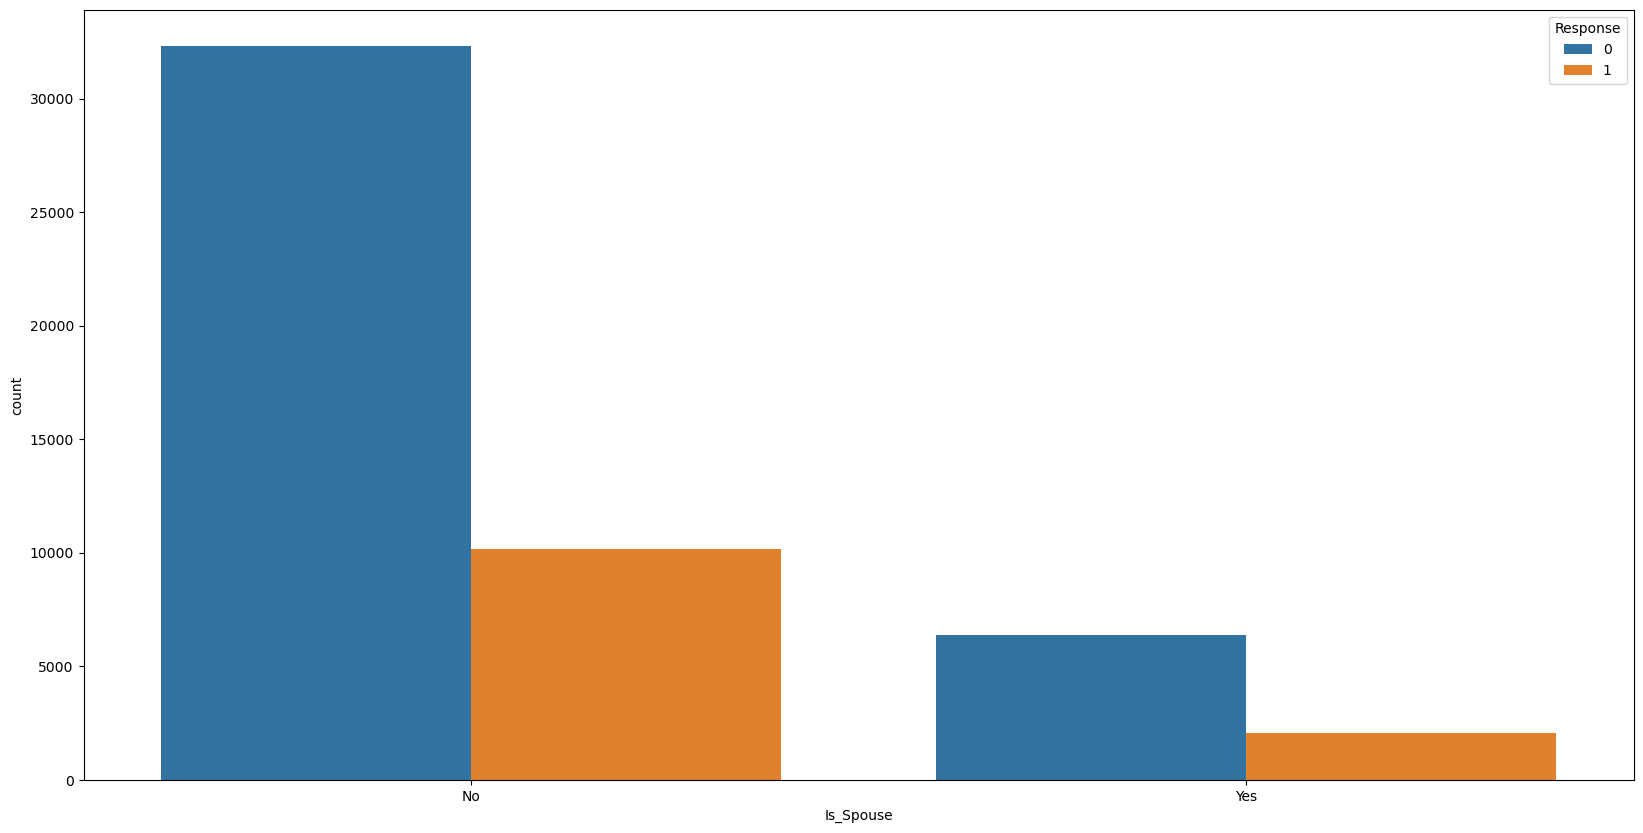

In [27]:
plt.figure(figsize=(20,10))
sns.countplot(x='Is_Spouse',hue='Response',data=traindf)

* Customers who married have lesser interest on new insurance

### 9.Health Indicator 

In [28]:
traindf["Health Indicator"].value_counts() # Encoding we use here

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

<AxesSubplot:xlabel='Health Indicator', ylabel='count'>

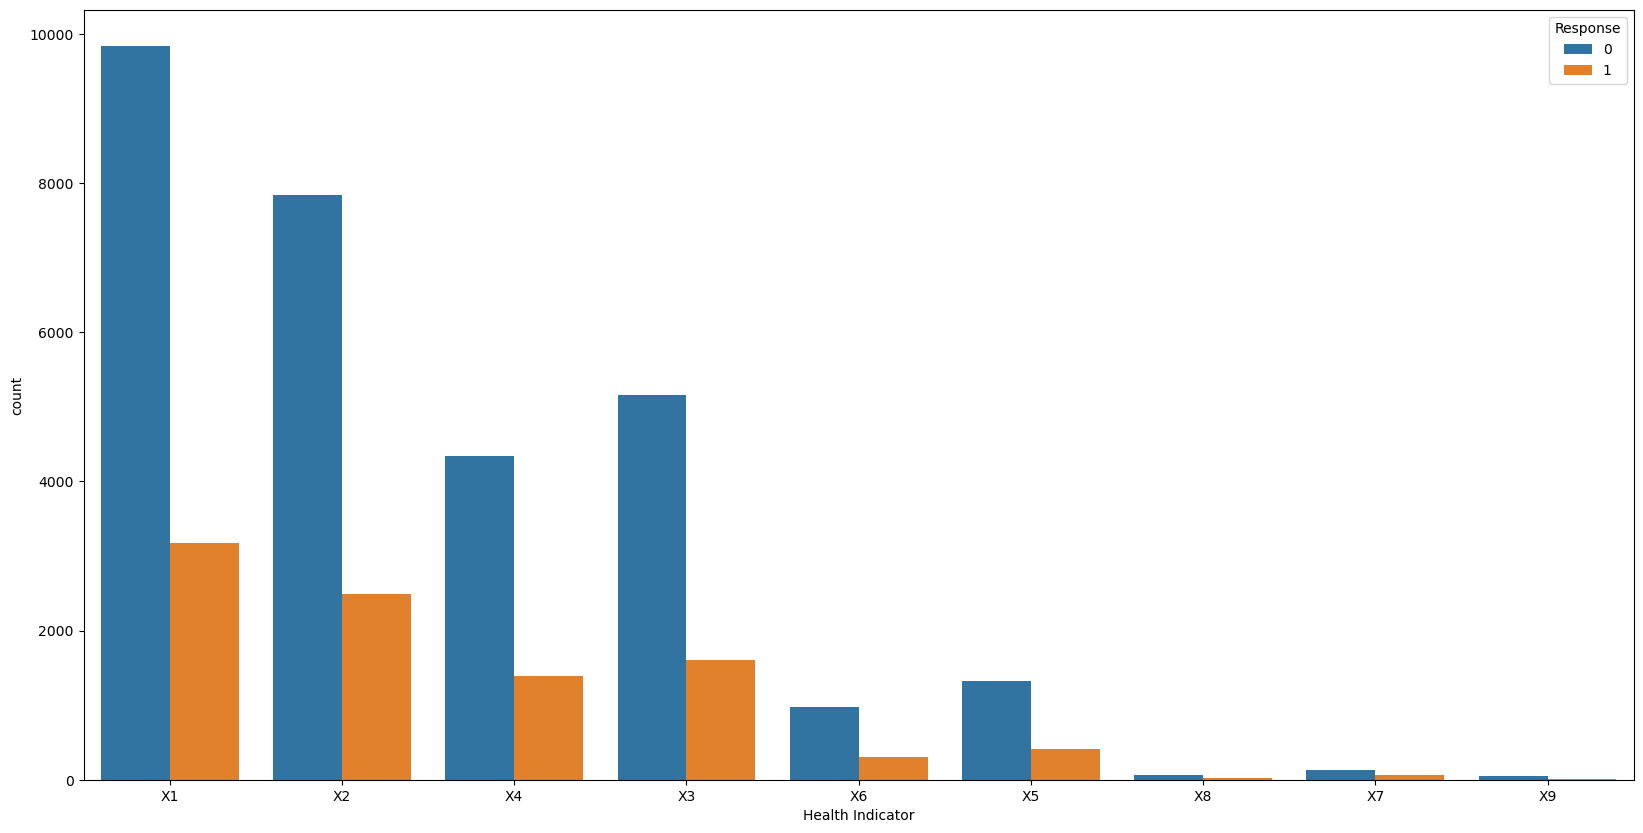

In [29]:
plt.figure(figsize=(20,10))
sns.countplot(x='Health Indicator',hue='Response',data=traindf)

### 10. Holding_Policy_Duration

In [30]:
traindf['Holding_Policy_Duration'].value_counts()

1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

<AxesSubplot:xlabel='Holding_Policy_Duration', ylabel='count'>

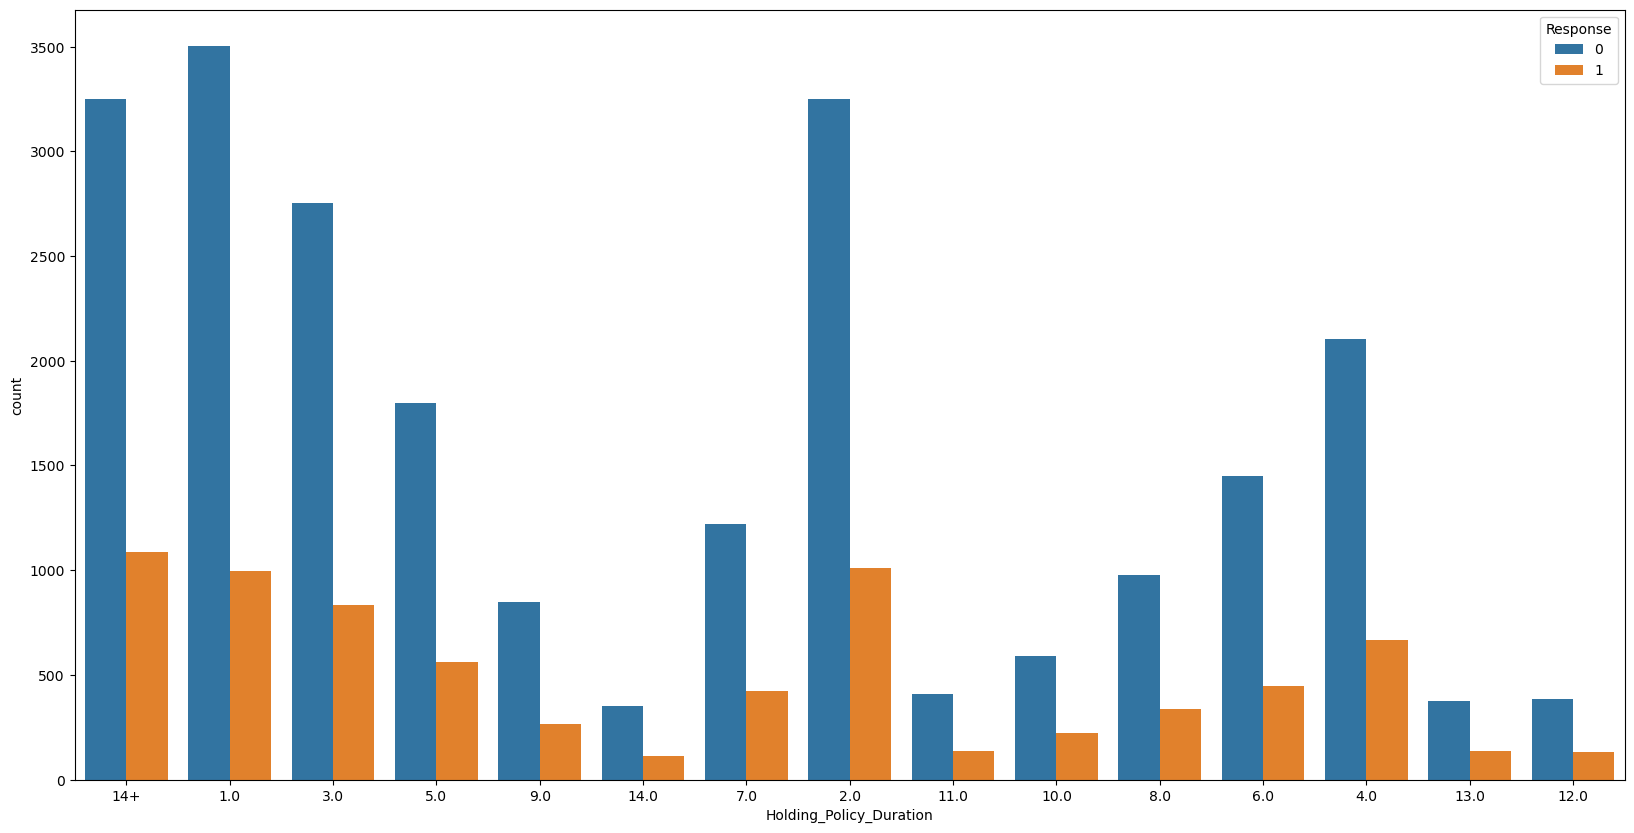

In [31]:
plt.figure(figsize=(20,10))
sns.countplot(x='Holding_Policy_Duration',hue='Response',data=traindf)

### 11.  Holding_Policy_Type 

<AxesSubplot:xlabel='Holding_Policy_Type', ylabel='count'>

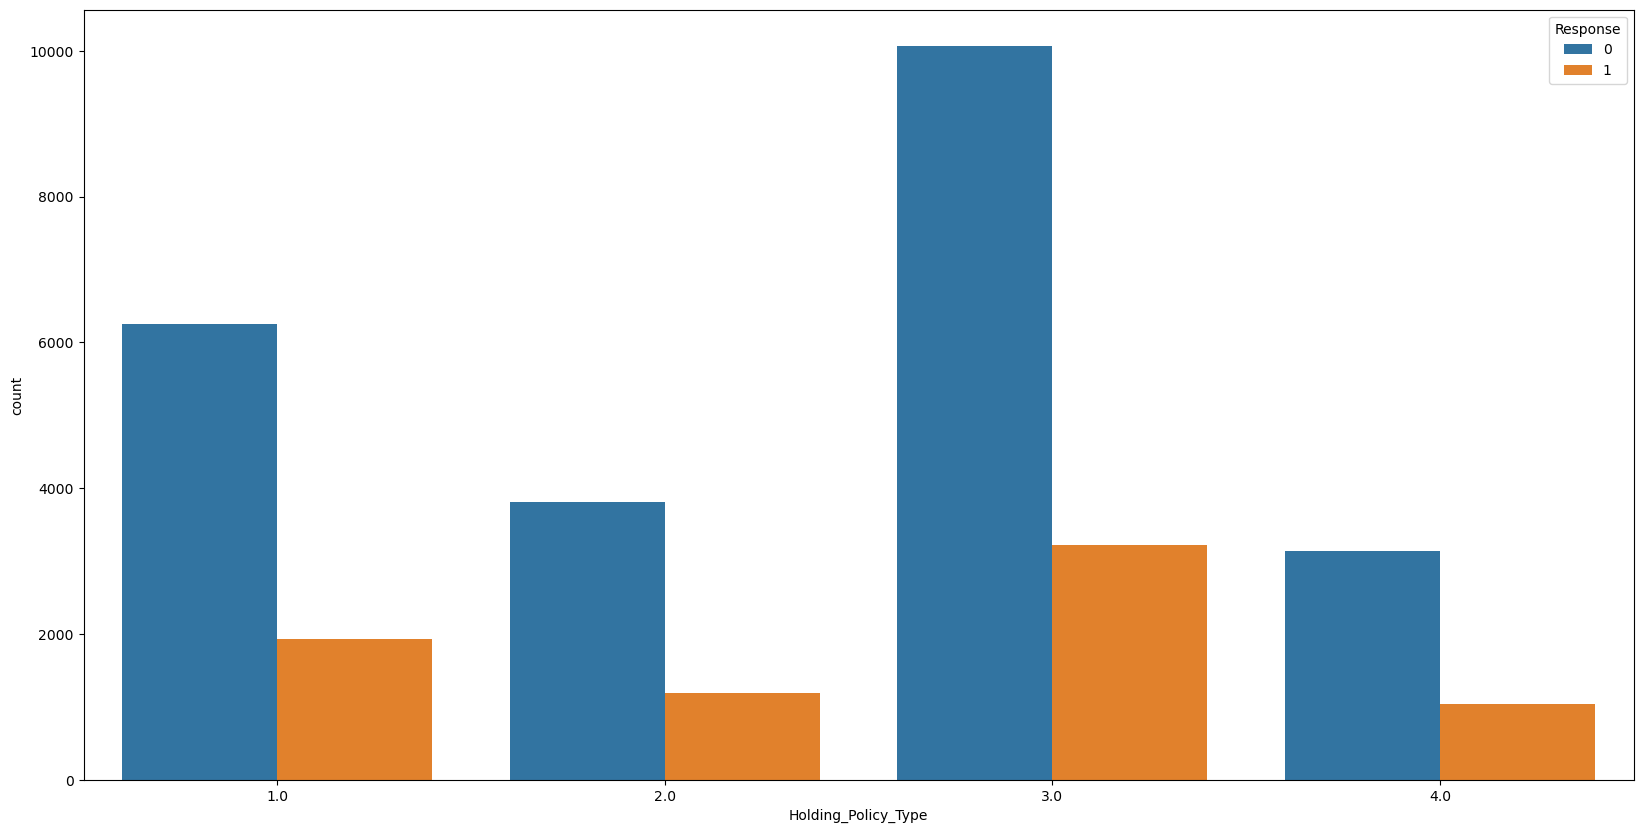

In [32]:
plt.figure(figsize=(20,10))
sns.countplot(x='Holding_Policy_Type',hue='Response',data=traindf)

### 12.Reco_Policy_Cat    

In [33]:
traindf['Reco_Policy_Cat'].value_counts()

22    6602
18    5553
21    5027
16    4084
17    3756
19    3708
20    3177
12    2168
1     1967
2     1917
14    1742
13    1684
15    1615
3     1059
4     1015
5     1007
6      851
7      834
9      789
11     781
8      776
10     770
Name: Reco_Policy_Cat, dtype: int64

<AxesSubplot:>

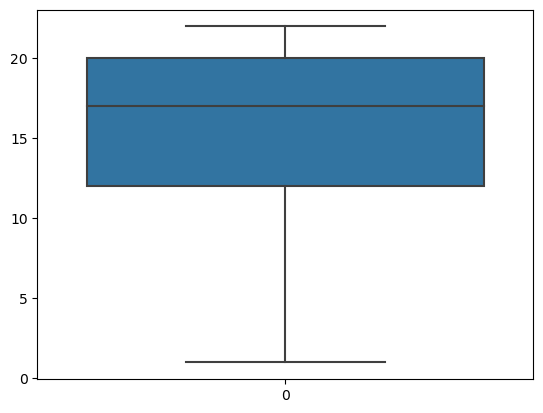

In [34]:
sns.boxplot(data=traindf["Reco_Policy_Cat"])

### 13.Reco_Policy_Premium

In [35]:
traindf["Reco_Policy_Premium"].value_counts()

10080.0    61
11880.0    59
12060.0    58
9296.0     56
11520.0    54
           ..
32886.0     1
33804.0     1
18072.0     1
20566.0     1
11374.0     1
Name: Reco_Policy_Premium, Length: 6977, dtype: int64

<AxesSubplot:>

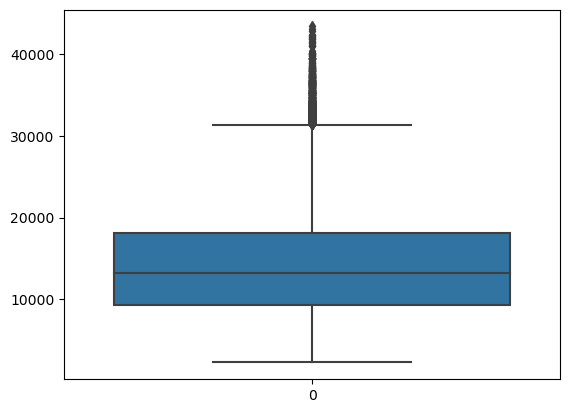

In [36]:
sns.boxplot(data= traindf["Reco_Policy_Premium"]) # Outliers are present

### Observations After EDA

Observations After EDA
The dataset consists of 13 features.

It is a binary classification problem.

The dataset is imbalanced.

Both train and test dataset contains a large number of missing values , so they should be imputed in an appropriate way.

Most of the features are categorical.

# 4.Feature Engineering

### 1.Handling missing values

#### Imputation - Health Indicator

In [37]:
traindf["Health Indicator"].mode()

0    X1
Name: Health Indicator, dtype: object

In [38]:
traindf["Health Indicator"].fillna('X1',inplace = True)
testdf["Health Indicator"].fillna('X1',inplace = True)
# Replace by most frequent value

In [39]:
traindf["Health Indicator"].isnull().sum()

0

#### Imputatation Holding_Policy_Duration

In [40]:
traindf['Holding_Policy_Duration'].mode()

0    1.0
Name: Holding_Policy_Duration, dtype: object

In [41]:
traindf['Holding_Policy_Duration'].fillna(1,inplace=True)
testdf['Holding_Policy_Duration'].fillna(1,inplace=True)

In [42]:
traindf['Holding_Policy_Duration'].isnull().sum()

0

#### Imputation - Holding_Policy_Type

In [43]:
traindf['Holding_Policy_Type'].mode()

0    3.0
Name: Holding_Policy_Type, dtype: float64

In [44]:
traindf['Holding_Policy_Type'].fillna(3.0, inplace=True)
testdf['Holding_Policy_Type'].fillna(3.0, inplace=True)

In [45]:
traindf['Holding_Policy_Type'].isna().sum()

0

Creating a new feature Long_term_customer from holding policy duration

In [46]:
traindf['Long_Term_Cust'] = traindf['Holding_Policy_Duration'].apply(lambda x: 'Yes' if x == '14+' else 'No')
testdf['Long_Term_Cust'] = testdf['Holding_Policy_Duration'].apply(lambda x: 'Yes' if x == '14+' else 'No')


#Replace categorical to numerical
traindf['Holding_Policy_Duration'] = traindf['Holding_Policy_Duration'].replace('14+',15).astype(float).astype(int)
testdf['Holding_Policy_Duration'] = testdf['Holding_Policy_Duration'].replace('14+',15).astype(float).astype(int)

#### Renaming Features

In [47]:
traindf.rename(columns={'Is_Spouse':'Married','Health Indicator':'Health_Indicator'},inplace = True)
testdf.rename(columns={'Is_Spouse':'Married','Health Indicator':'Health_Indicator'},inplace = True)

Typically, insurance products are priced and underwritten based on the age of the applicant. This is especially the case in most health insurance pricing. To reflect this and retain data, an average age feature will be created and the original two features will be dropped.

In [48]:
traindf['Avg_Age'] = (traindf['Upper_Age'] + traindf['Lower_Age']) / 2
testdf['Avg_Age']  = (testdf['Upper_Age'] + testdf['Lower_Age']) / 2

The unique 'ID' and 'Region Code' columns will be dropped in order to simplify the data. 'Region Code' consists of far too many categorical values which would need to be one hot encoded. The feature is dropped as the data still retains the 'City Code' feature to capture some level of geographical distinction. In addition, the upper and lower age features will be dropped being represented by average age.

In [49]:
traindf.drop(['ID','Region_Code','Upper_Age','Lower_Age'],axis=1,inplace=True)
testdf2 = testdf.copy()
testdf.drop(['ID','Region_Code','Upper_Age','Lower_Age'],axis=1,inplace=True)

### Encoding

Features 'Accommodation Type', 'Reco Insurance Type', 'Is Spouse' will be converted to binary (0 and 1).



In [50]:
vals = {'Rented':0,'Owned':1,'Individual':0,'Joint':1,'No':0,'Yes':1}
cols = ['Accomodation_Type','Reco_Insurance_Type','Married','Long_Term_Cust']

for col in cols:
    traindf[col] = traindf[col].replace(vals)
    testdf[col] = testdf[col].replace(vals)

In [51]:
traindf.head()

,City_Code,Accomodation_Type,Reco_Insurance_Type,Married,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Long_Term_Cust,Avg_Age
0,C3,0,0,0,X1,15,3.0,22,11628.0,0,1,36.0
1,C5,1,1,0,X2,1,3.0,22,30510.0,0,0,48.5
2,C5,1,0,0,X1,1,1.0,19,7450.0,1,0,32.0
3,C24,1,1,0,X1,15,3.0,19,17780.0,0,1,50.0
4,C8,0,0,0,X2,3,1.0,16,10404.0,0,0,44.0


Features City_Code and Health_Indicator have sequence so these features will encoded with ordinal encoding

In [52]:
traindf["Health_Indicator"].unique()

array(['X1', 'X2', 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9'], dtype=object)

In [53]:
cat1 = ['C3', 'C5', 'C24', 'C8', 'C9', 'C1', 'C15', 'C28', 'C27', 'C7',
       'C20', 'C25', 'C4', 'C2', 'C34', 'C10', 'C17', 'C18', 'C16', 'C29',
       'C33', 'C26', 'C19', 'C6', 'C12', 'C13', 'C11', 'C14', 'C22',
       'C23', 'C21', 'C36', 'C32', 'C30', 'C35', 'C31'] 
cat2 = ['X1', 'X2', 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9']
for i in range(0,len(cat2)):
    traindf["Health_Indicator"] = traindf["Health_Indicator"].replace(cat2[i],i) 
    testdf["Health_Indicator"] = testdf["Health_Indicator"].replace(cat2[i],i) 
for i in range(0,len(cat1)):
    traindf["City_Code"] = traindf["City_Code"].replace(cat1[i],i) 
    testdf["City_Code"] = testdf["City_Code"].replace(cat1[i],i)    

### Checking Co-relation

<AxesSubplot:>

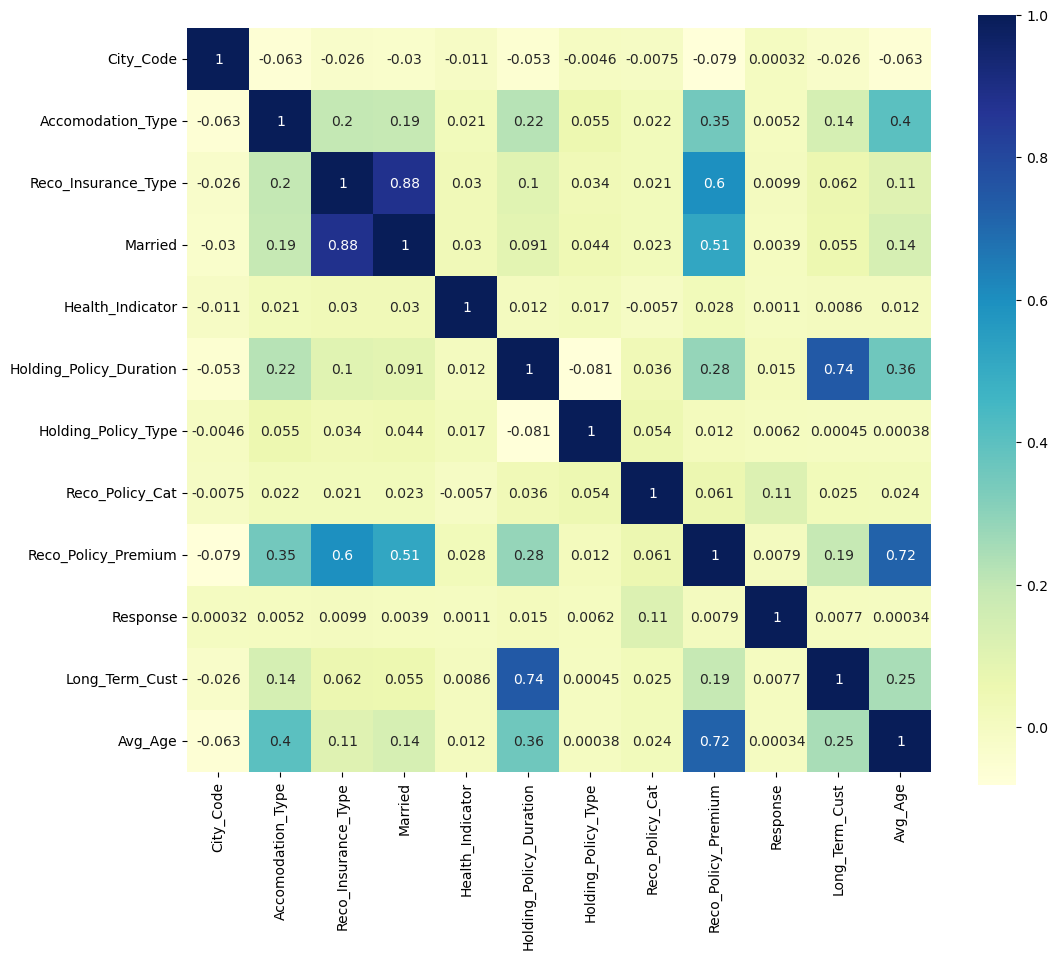

In [54]:
corr = traindf.corr() # analyzing correlation
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr, square=True, annot=True, cmap='YlGnBu')

In [55]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                21805 non-null  int64  
 1   Accomodation_Type        21805 non-null  int64  
 2   Reco_Insurance_Type      21805 non-null  int64  
 3   Married                  21805 non-null  int64  
 4   Health_Indicator         21805 non-null  int64  
 5   Holding_Policy_Duration  21805 non-null  int32  
 6   Holding_Policy_Type      21805 non-null  float64
 7   Reco_Policy_Cat          21805 non-null  int64  
 8   Reco_Policy_Premium      21805 non-null  float64
 9   Long_Term_Cust           21805 non-null  int64  
 10  Avg_Age                  21805 non-null  float64
dtypes: float64(3), int32(1), int64(7)
memory usage: 1.7 MB


In [56]:
x = traindf.drop("Response",axis=1)
y = traindf["Response"]
y.value_counts()

0    38673
1    12209
Name: Response, dtype: int64

* Since data in target column is unbalanced . Therefore , we use sampling technique to balance data i.e. SMOTE technique for oversampling

In [57]:
smt = SMOTE(sampling_strategy=0.85,k_neighbors=5,random_state=45)
x_sampled,y_sampled = smt.fit_resample(x,y)
y_sampled.value_counts()

0    38673
1    32872
Name: Response, dtype: int64

### Splitting of data

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x_sampled, y_sampled, test_size=0.33, random_state=42)

# 4.Feature Selection

#### Principal Component Analysis

In [59]:
# Preprocessing
pc_name = [f"PC{i}" for i in range(1,x_train.shape[1]+1)]
pc_name

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11']

In [60]:
std_scalar = StandardScaler()
std_array = std_scalar.fit_transform(x_train)
x_train_std = pd.DataFrame(std_array,columns=x_train.columns)
# x_train_std
pca = PCA(n_components=None)
x_train_pca = pca.fit_transform(x_train_std)
pc_name = [f"PC{i}" for i in range(1,x_train_pca.shape[1]+1)]
x_train_pca = pd.DataFrame(x_train_pca,columns=pc_name)
x_train_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-1.106524,-0.204323,-0.190634,-0.790310,-0.531835,1.889811,0.143865,-1.328548,-0.215330,0.176231,-0.182442
1,-1.717914,-0.302046,0.418330,-0.193177,-0.040638,1.690928,-0.762130,-1.688572,-0.095400,0.157531,-0.121097
2,-0.405873,0.428139,-0.951589,-0.677290,-0.725004,0.365412,-0.003129,-1.061689,0.209330,-0.216915,0.196108
3,-1.827949,-0.414768,0.128758,-0.942551,1.777384,-1.994454,0.492619,0.141040,-0.108667,0.041186,-0.057939
4,-2.249468,-0.394923,0.558792,-0.921795,-0.091118,-0.192784,-0.075899,-0.118785,-0.052935,-0.156783,0.153337
...,...,...,...,...,...,...,...,...,...,...,...
47930,-1.150009,0.436939,0.142882,-1.173646,-0.459121,-1.143374,0.158058,0.250706,0.841185,-0.063825,0.022298
47931,-0.682361,-0.031468,-1.111659,-0.580199,-1.105137,-0.747725,0.112328,0.961857,-0.354295,-0.272681,0.168572
47932,-2.116756,-0.387975,0.395735,-0.845546,-0.109568,-0.512583,-0.141963,-0.048688,-0.080900,-0.086494,0.074514
47933,-1.725769,0.224568,0.990598,-0.186337,0.321545,-0.004582,-0.797929,0.159192,0.787159,-0.144995,0.134332


# 5.Model Selection

## Logistic Regression 

In [61]:
lr_model = LogisticRegression()

In [62]:
lr_model.fit(x_train,y_train)

LogisticRegression()

In [63]:
# Training
y_pred_train = lr_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix\n",cnf_matrix)
print("*"*20)
accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy",accuracy)
print("*"*20)
clf_report = classification_report(y_train,y_pred_train)
print("classificatio report\n",clf_report)

confusion matrix
 [[16906  9026]
 [11824 10179]]
********************
accuracy 0.565035986231355
********************
classificatio report
               precision    recall  f1-score   support

           0       0.59      0.65      0.62     25932
           1       0.53      0.46      0.49     22003

    accuracy                           0.57     47935
   macro avg       0.56      0.56      0.56     47935
weighted avg       0.56      0.57      0.56     47935



In [64]:
# Testing
y_pred_test = lr_model.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("confusion matrix\n",cnf_matrix)
print("*"*20)
accuracy = accuracy_score(y_test,y_pred_test)
print("accuracy",accuracy)
print("*"*20)
clf_report = classification_report(y_test,y_pred_test)
print("classificatio report\n",clf_report)

confusion matrix
 [[8223 4518]
 [5921 4948]]
********************
accuracy 0.5578568403218975
********************
classificatio report
               precision    recall  f1-score   support

           0       0.58      0.65      0.61     12741
           1       0.52      0.46      0.49     10869

    accuracy                           0.56     23610
   macro avg       0.55      0.55      0.55     23610
weighted avg       0.55      0.56      0.55     23610



## Decision Tree

In [65]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

##### Hyperparameter Tuning for DT

In [66]:
# hyper_para = {"criterion" :['gini',"entropy"],
#               "max_depth":np.arange(2,8),
#         "min_samples_split":np.arange(3,20),
#         "min_samples_leaf":np.arange(3,15),
#              }
# gscv_dt_clf = GridSearchCV(dt_clf,hyper_para,cv=5)
# gscv_dt_clf.fit(x_train,y_train)

In [67]:
#gscv_dt_clf.best_estimator_

##### DecisionTree with hyperparameter tuning

In [68]:
dt_clf_with_tuning = DecisionTreeClassifier(criterion='gini',max_depth=7, min_samples_leaf=13, min_samples_split=3)
dt_clf_with_tuning.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=13, min_samples_split=3)

In [69]:
# Training
y_pred_train = dt_clf_with_tuning.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix\n",cnf_matrix)
print("*"*20)
accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy",accuracy)
print("*"*20)
clf_report = classification_report(y_train,y_pred_train)
print("classificatio report\n",clf_report)

confusion matrix
 [[21529  4403]
 [ 9825 12178]]
********************
accuracy 0.7031813914676124
********************
classificatio report
               precision    recall  f1-score   support

           0       0.69      0.83      0.75     25932
           1       0.73      0.55      0.63     22003

    accuracy                           0.70     47935
   macro avg       0.71      0.69      0.69     47935
weighted avg       0.71      0.70      0.70     47935



In [70]:
# Testing
y_pred_test = dt_clf_with_tuning.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("confusion matrix\n",cnf_matrix)
print("*"*20)
accuracy = accuracy_score(y_test,y_pred_test)
print("accuracy",accuracy)
print("*"*20)
clf_report = classification_report(y_test,y_pred_test)
print("classificatio report\n",clf_report)

confusion matrix
 [[10567  2174]
 [ 4877  5992]]
********************
accuracy 0.7013553578991952
********************
classificatio report
               precision    recall  f1-score   support

           0       0.68      0.83      0.75     12741
           1       0.73      0.55      0.63     10869

    accuracy                           0.70     23610
   macro avg       0.71      0.69      0.69     23610
weighted avg       0.71      0.70      0.69     23610



## Random Forest

In [71]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [72]:
#Training 
y_pred_train = rf_clf.predict(x_train)

cnf_metrics = confusion_matrix(y_train,y_pred_train)
print("confusion metrics\n",cnf_metrics)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy",accuracy)
clf_report = classification_report(y_train,y_pred_train)
print("clf_report\n",clf_report)

confusion metrics
 [[25930     2]
 [    2 22001]]
accuracy 0.9999165536664233
clf_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25932
           1       1.00      1.00      1.00     22003

    accuracy                           1.00     47935
   macro avg       1.00      1.00      1.00     47935
weighted avg       1.00      1.00      1.00     47935



In [73]:
#Testing
y_pred_test = rf_clf.predict(x_test)

cnf_metrics = confusion_matrix(y_test,y_pred_test)
print("confusion metrics\n",cnf_metrics)

accuracy = accuracy_score(y_test,y_pred_test)
print("accuracy",accuracy)
clf_report = classification_report(y_test,y_pred_test)
print("clf_report\n",clf_report)

confusion metrics
 [[10921  1820]
 [ 3941  6928]]
accuracy 0.755993223210504
clf_report
               precision    recall  f1-score   support

           0       0.73      0.86      0.79     12741
           1       0.79      0.64      0.71     10869

    accuracy                           0.76     23610
   macro avg       0.76      0.75      0.75     23610
weighted avg       0.76      0.76      0.75     23610



## Adabost

In [74]:
adb_clf = AdaBoostClassifier()
adb_clf.fit(x_train,y_train)

AdaBoostClassifier()

In [75]:
#Training 
y_pred_train = adb_clf.predict(x_train)

cnf_metrics = confusion_matrix(y_train,y_pred_train)
print("confusion metrics\n",cnf_metrics)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy",accuracy)
clf_report = classification_report(y_train,y_pred_train)
print("clf_report\n",clf_report)

confusion metrics
 [[21914  4018]
 [10295 11708]]
accuracy 0.7014081568791071
clf_report
               precision    recall  f1-score   support

           0       0.68      0.85      0.75     25932
           1       0.74      0.53      0.62     22003

    accuracy                           0.70     47935
   macro avg       0.71      0.69      0.69     47935
weighted avg       0.71      0.70      0.69     47935



In [76]:
#Testing
y_pred_test = adb_clf.predict(x_test)

cnf_metrics = confusion_matrix(y_test,y_pred_test)
print("confusion metrics\n",cnf_metrics)

accuracy = accuracy_score(y_test,y_pred_test)
print("accuracy",accuracy)
clf_report = classification_report(y_test,y_pred_test)
print("clf_report\n",clf_report)

confusion metrics
 [[10871  1870]
 [ 5114  5755]]
accuracy 0.7041931385006354
clf_report
               precision    recall  f1-score   support

           0       0.68      0.85      0.76     12741
           1       0.75      0.53      0.62     10869

    accuracy                           0.70     23610
   macro avg       0.72      0.69      0.69     23610
weighted avg       0.71      0.70      0.69     23610



## GradientBoost

In [77]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [78]:
#Training 
y_pred_train = gb_clf.predict(x_train)

cnf_metrics = confusion_matrix(y_train,y_pred_train)
print("confusion metrics\n",cnf_metrics)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy",accuracy)
clf_report = classification_report(y_train,y_pred_train)
print("clf_report\n",clf_report)

confusion metrics
 [[24061  1871]
 [10417 11586]]
accuracy 0.7436528632523208
clf_report
               precision    recall  f1-score   support

           0       0.70      0.93      0.80     25932
           1       0.86      0.53      0.65     22003

    accuracy                           0.74     47935
   macro avg       0.78      0.73      0.73     47935
weighted avg       0.77      0.74      0.73     47935



In [79]:
#Testing
y_pred_test = gb_clf.predict(x_test)

cnf_metrics = confusion_matrix(y_test,y_pred_test)
print("confusion metrics\n",cnf_metrics)

accuracy = accuracy_score(y_test,y_pred_test)
print("accuracy",accuracy)
clf_report = classification_report(y_test,y_pred_test)
print("clf_report\n",clf_report)

confusion metrics
 [[11853   888]
 [ 5230  5639]]
accuracy 0.7408725116476069
clf_report
               precision    recall  f1-score   support

           0       0.69      0.93      0.79     12741
           1       0.86      0.52      0.65     10869

    accuracy                           0.74     23610
   macro avg       0.78      0.72      0.72     23610
weighted avg       0.77      0.74      0.73     23610



## XGboost

In [80]:
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [81]:
#Training 
y_pred_train = xgb_clf.predict(x_train)

cnf_metrics = confusion_matrix(y_train,y_pred_train)
print("confusion metrics\n",cnf_metrics)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy",accuracy)
clf_report = classification_report(y_train,y_pred_train)
print("clf_report\n",clf_report)

confusion metrics
 [[24949   983]
 [ 6789 15214]]
accuracy 0.837863773860436
clf_report
               precision    recall  f1-score   support

           0       0.79      0.96      0.87     25932
           1       0.94      0.69      0.80     22003

    accuracy                           0.84     47935
   macro avg       0.86      0.83      0.83     47935
weighted avg       0.86      0.84      0.83     47935



In [82]:
#Testing
y_pred_test = xgb_clf.predict(x_test)

cnf_metrics = confusion_matrix(y_test,y_pred_test)
print("confusion metrics\n",cnf_metrics)

accuracy = accuracy_score(y_test,y_pred_test)
print("accuracy",accuracy)
clf_report = classification_report(y_test,y_pred_test)
print("clf_report\n",clf_report)

confusion metrics
 [[11912   829]
 [ 3941  6928]]
accuracy 0.7979669631512071
clf_report
               precision    recall  f1-score   support

           0       0.75      0.93      0.83     12741
           1       0.89      0.64      0.74     10869

    accuracy                           0.80     23610
   macro avg       0.82      0.79      0.79     23610
weighted avg       0.82      0.80      0.79     23610



<AxesSubplot:>

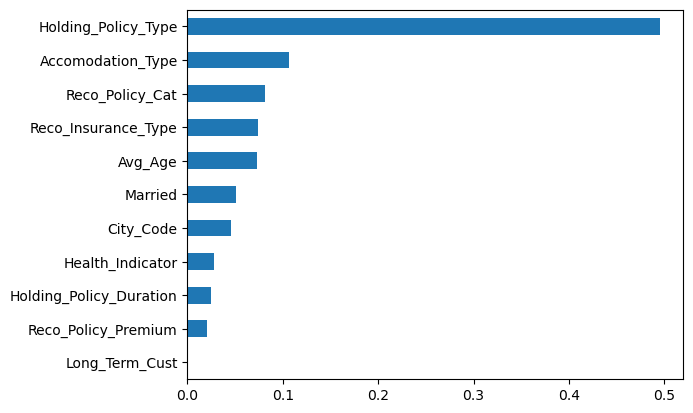

In [83]:
s = pd.Series(xgb_clf.feature_importances_,index=x.columns)
s.sort_values().plot(kind="barh")

* Long_Term_Cust is not contributing in formation of tree so this feature will be removed

In [84]:
x_train_new = x_train.drop("Long_Term_Cust", axis=1) # Removing long_Term_Cust
x_test_new = x_test.drop("Long_Term_Cust", axis=1)

In [85]:
x_train_new.shape

(47935, 10)

In [86]:
xgb_clf_new = XGBClassifier()
xgb_clf_new.fit(x_train_new,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [87]:
#Training 
y_pred_train = xgb_clf_new.predict(x_train_new)

cnf_metrics = confusion_matrix(y_train,y_pred_train)
print("confusion metrics\n",cnf_metrics)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy",accuracy)
clf_report = classification_report(y_train,y_pred_train)
print("clf_report\n",clf_report)

confusion metrics
 [[24949   983]
 [ 6789 15214]]
accuracy 0.837863773860436
clf_report
               precision    recall  f1-score   support

           0       0.79      0.96      0.87     25932
           1       0.94      0.69      0.80     22003

    accuracy                           0.84     47935
   macro avg       0.86      0.83      0.83     47935
weighted avg       0.86      0.84      0.83     47935



In [88]:
#Testing
y_pred_test = xgb_clf_new.predict(x_test_new)

cnf_metrics = confusion_matrix(y_test,y_pred_test)
print("confusion metrics\n",cnf_metrics)

accuracy = accuracy_score(y_test,y_pred_test)
print("accuracy",accuracy)
clf_report = classification_report(y_test,y_pred_test)
print("clf_report\n",clf_report)

confusion metrics
 [[11912   829]
 [ 3941  6928]]
accuracy 0.7979669631512071
clf_report
               precision    recall  f1-score   support

           0       0.75      0.93      0.83     12741
           1       0.89      0.64      0.74     10869

    accuracy                           0.80     23610
   macro avg       0.82      0.79      0.79     23610
weighted avg       0.82      0.80      0.79     23610



### xGboost with PCA

In [89]:
xgb_clf_pca = XGBClassifier()
xgb_clf_pca.fit(x_train_pca,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [90]:
#Training 
y_pred_train = xgb_clf_pca.predict(x_train_pca)

cnf_metrics = confusion_matrix(y_train,y_pred_train)
print("confusion metrics\n",cnf_metrics)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy",accuracy)
clf_report = classification_report(y_train,y_pred_train)
print("clf_report\n",clf_report)

confusion metrics
 [[20143  5789]
 [ 6137 15866]]
accuracy 0.7512047564410139
clf_report
               precision    recall  f1-score   support

           0       0.77      0.78      0.77     25932
           1       0.73      0.72      0.73     22003

    accuracy                           0.75     47935
   macro avg       0.75      0.75      0.75     47935
weighted avg       0.75      0.75      0.75     47935



## Model Building

XGboost gives better accuracy

In [91]:
# with open("xgb_model.pkl","wb") as f:
#     pickle.dump(xgb_clf_new,f)

In [92]:
# list(x_train.columns)
data = {"columns":list(x_train_new.columns)}

## Testing User input

In [93]:
list(x_train_new.columns)

['City_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Married',
 'Health_Indicator',
 'Holding_Policy_Duration',
 'Holding_Policy_Type',
 'Reco_Policy_Cat',
 'Reco_Policy_Premium',
 'Avg_Age']

In [94]:
vals = {'Rented':0,'Owned':1,'Individual':0,'Joint':1,'No':0,'Yes':1}
cols = ['Accomodation_Type','Reco_Insurance_Type','Married','Long_Term_Cust']
cat1 = ['C3', 'C5', 'C24', 'C8', 'C9', 'C1', 'C15', 'C28', 'C27', 'C7',
       'C20', 'C25', 'C4', 'C2', 'C34', 'C10', 'C17', 'C18', 'C16', 'C29',
       'C33', 'C26', 'C19', 'C6', 'C12', 'C13', 'C11', 'C14', 'C22',
       'C23', 'C21', 'C36', 'C32', 'C30', 'C35', 'C31'] 
cat2 = ['X1', 'X2', 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9']

In [95]:
City_Code = {}
lst1  = range(0,len(cat1))
j=0
for i in cat1:
    City_Code[i] = lst1[j]
    j+=1

In [96]:
Health_Indicator = {}
lst2  = range(0,len(cat2))
j=0
for i in cat2:
    Health_Indicator[i] = lst2[j]
    j+=1

In [97]:
project_data = {'Accomodation_Type':{'Rented':0,'Owned':1},'Reco_Insurance_Type':{'Individual':0,'Joint':1},
                "Married":{"yes":1,"no":0},"Health_Indicator":Health_Indicator,"City_Code":City_Code,"columns":list(x_train_new.columns)}

In [98]:
# with open("project_data.json","w") as f: #features for single row
#     json.dump(project_data,f)

In [99]:
City_Code               = "C31"
Accomodation_Type       = "Rented"
Reco_Insurance_Type     = "Individual"
Married                 = "yes"
Health_Indicator        = "X4" 
Holding_Policy_Duration = 7
Holding_Policy_Type     = 1.0
Reco_Policy_Cat         = 19
Reco_Policy_Premium     = 30500 
Avg_Age                 = 40

In [108]:
column_names  = x_train_new.columns
test_array    = np.zeros(x_train_new.shape[1])
test_array[0] = project_data['City_Code'][City_Code]
test_array[1] = project_data['Accomodation_Type'][Accomodation_Type]
test_array[2] = project_data['Reco_Insurance_Type'][Reco_Insurance_Type]
test_array[3] = project_data['Married'][Married]
test_array[4] = project_data["Health_Indicator"][Health_Indicator]
test_array[5] = Holding_Policy_Duration
test_array[6] = Holding_Policy_Type
test_array[7] = Reco_Policy_Cat
test_array[8] = Reco_Policy_Premium
test_array[9] = Avg_Age
 
test_array.shape

(10,)

In [110]:
array = test_array.reshape(1,10)
array

array([[3.50e+01, 0.00e+00, 0.00e+00, 1.00e+00, 2.00e+00, 7.00e+00,
        1.00e+00, 1.90e+01, 3.05e+04, 4.00e+01]])

In [111]:
xgb_clf_new.predict(array)

array([0])